# **Entrenamiento y prediccion**

## **Metodos necesarios**

### **Matriz de confusion**

In [291]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import numpy as np
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title='Matriz de Confusión', cmap=plt.cm.Blues):
    """
    Esta función muestra una matriz de confusión en forma gráfica.
    """
    # Crear matriz de confusión
    cm = confusion_matrix(y_true, y_pred)

    # Normalizar los valores si es necesario
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Configurar el gráfico
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    # Etiquetar los ejes
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Etiqueta Real')
    plt.xlabel('Etiqueta Predicha')
    plt.tight_layout()
    plt.show()

# **1. Enfoque 1 - Frecuencia Mel**

In [292]:
import pandas as pd

df = pd.read_csv('./Datos/enfoque1/dataframe.csv')

df

,feature,label
0,[-655.03894 63.1695 10.757038 21.1...,whistle
1,[-578.7469 81.91728 -10.924023 11.2...,whistle
2,[-567.00964 82.101105 -14.731988 12.7339...,whistle
3,[-576.83685 77.57335 -15.542832 14.3...,whistle
4,[-557.8747 78.30917 -13.749625 16.7...,whistle
...,...,...
5454,[-562.69415 70.66823 -6.884647 23.8...,allfreq
5455,[-546.1909 69.080666 -14.523592 22.1...,allfreq
5456,[-586.30975 74.10078 -6.768806 26.6...,allfreq
5457,[-585.0476 75.75177 -2.8806534 26.3...,allfreq


In [293]:
import numpy as np

print(type(df['feature'][0]))

# Función para convertir la cadena en un arreglo NumPy
def convert_to_array(str_val):
    str_val = str_val.replace('\n', '').replace('  ', ' ')
    str_val = str_val.strip('[]')
    features_list = str_val.split()
    features = [float(value) for value in features_list]
    return np.array(features)

# Aplicar la función a la columna 'feature'
df['feature'] = df['feature'].apply(convert_to_array)

print(type(df['feature'][0]))

<class 'str'>
<class 'numpy.ndarray'>


In [294]:
features = df['feature'].to_list()
X = pd.DataFrame(columns=range(len(features[0])), data=features)
y = df.drop(columns='feature')

In [295]:
from sklearn.model_selection import train_test_split

# Dividir el tercio aleatorio en un 20% para el conjunto de prueba y un 80% para el conjunto de entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [296]:
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
498,-610.15,82.88,16.21,22.41,2.90,29.77,0.94,15.33,-16.04,19.52,-9.07,20.71,-12.88,16.81,-15.03,13.74,-10.06,12.89,-6.35,8.69
4252,-567.71,76.87,-6.47,20.98,4.92,27.15,4.17,23.82,-1.88,21.59,-6.22,21.26,-2.76,20.67,-4.08,14.69,-4.16,13.08,0.41,9.21
415,-647.32,62.45,12.97,25.97,5.92,27.98,-0.32,17.28,-13.07,18.10,-10.33,23.21,-13.25,22.07,-9.36,19.12,-7.37,14.53,-8.69,9.94
1876,-625.77,84.52,12.43,17.64,-1.04,22.08,-8.28,12.47,-17.15,13.59,-20.38,19.64,-15.39,17.92,-13.41,17.09,-8.27,15.34,-3.92,10.71
2749,-660.52,74.53,26.98,33.18,5.40,27.36,-0.41,23.02,-7.77,23.28,-12.67,23.81,-10.82,19.75,-7.75,15.64,-8.45,10.32,-4.92,6.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,-583.44,82.81,-5.00,15.96,1.66,27.56,8.39,25.63,-3.53,23.44,-5.68,23.79,-1.83,22.38,-3.87,15.69,-5.14,12.33,0.72,9.45
5191,-658.33,72.57,23.33,30.99,5.25,27.04,0.59,25.39,-6.94,25.04,-10.87,22.81,-10.37,20.49,-8.09,15.11,-7.02,10.47,-4.30,6.49
5226,-597.80,65.92,-1.90,22.72,-1.86,26.12,-1.11,21.37,-9.52,21.64,-9.99,22.95,-7.19,20.37,-6.56,16.00,-5.02,12.44,-1.63,9.62
5390,-644.77,70.61,21.75,25.12,5.57,30.15,5.16,22.93,-7.24,21.12,-10.99,23.63,-8.08,19.14,-6.96,13.91,-4.71,13.75,1.55,10.26


In [297]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models.sort_values('Accuracy', ascending=False)


100%|██████████| 29/29 [00:09<00:00,  2.92it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.71,0.40,None,0.69,1.62
SVC,0.71,0.40,None,0.69,0.73
ExtraTreesClassifier,0.70,0.39,None,0.68,0.48
LGBMClassifier,0.70,0.40,None,0.68,0.32
BaggingClassifier,0.69,0.40,None,0.68,0.67
RidgeClassifierCV,0.68,0.36,None,0.64,0.04
LinearSVC,0.68,0.36,None,0.65,0.63
CalibratedClassifierCV,0.68,0.36,None,0.65,2.31
RidgeClassifier,0.68,0.36,None,0.64,0.03


**RandomForestClassifier**

Accuracy: 0.7078754578754579


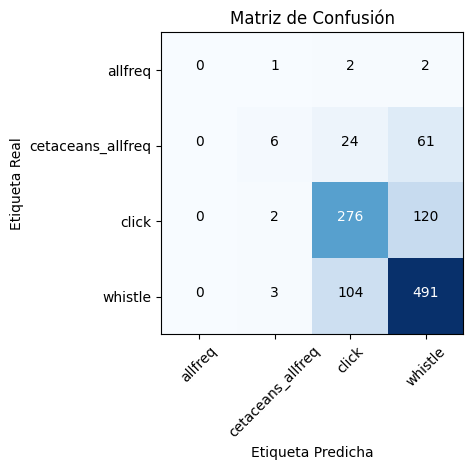

In [298]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Crear una instancia del clasificador RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Entrenar el modelo usando los datos de entrenamiento
rf_classifier.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = rf_classifier.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Imprimir matriz de confusión
plot_confusion_matrix(y_test, y_pred, classes = unique_labels(y_test, y_pred))

**SVC**

Accuracy: 0.641941391941392


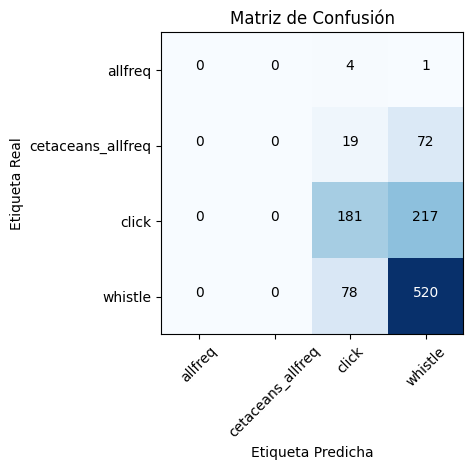

In [299]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Crear una instancia del clasificador SVC
svc_classifier = SVC()

# Entrenar el modelo usando los datos de entrenamiento
svc_classifier.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = svc_classifier.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Imprimir matriz de confusión
plot_confusion_matrix(y_test, y_pred, classes=unique_labels(y_test, y_pred))


**Red Neuronal con LSTM**

In [300]:
y_train['label'].unique()

array(['whistle', 'click', 'cetaceans_allfreq', 'allfreq', 'volcano'],
      dtype=object)

In [301]:
y_train

,label
498,whistle
4252,click
415,whistle
1876,whistle
2749,whistle
...,...
3772,click
5191,click
5226,click
5390,click


In [302]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Combinar y_train y y_test
y_combined = np.concatenate((y_train, y_test), axis=0)

# Aplicar LabelEncoder y to_categorical a y_combined
le = LabelEncoder()
y_encoded = le.fit_transform(y_combined)
y_categorical = to_categorical(y_encoded)

# Dividir nuevamente en y_train y y_test
y_train = y_categorical[:len(y_train)]
y_test = y_categorical[len(y_train):]


In [303]:
from keras.models import Sequential
from keras.layers import LSTM, Dense


# Definir la arquitectura del modelo
model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1], 1)))
model.add(Dense(64))
model.add(Dense(5, activation='softmax'))

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=50, batch_size=128,
          validation_data=(X_test, y_test))

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test)

print("Loss:", loss)
print("Accuracy:", accuracy)


Epoch 1/50
35/35 [==============================] - 2s 20ms/step - loss: 0.9980 - accuracy: 0.5226 - val_loss: 0.8957 - val_accuracy: 0.5852
Epoch 2/50
35/35 [==============================] - 0s 10ms/step - loss: 0.9149 - accuracy: 0.5578 - val_loss: 0.8762 - val_accuracy: 0.6044
Epoch 3/50
35/35 [==============================] - 0s 9ms/step - loss: 0.9007 - accuracy: 0.5722 - val_loss: 0.8558 - val_accuracy: 0.6255
Epoch 4/50
35/35 [==============================] - 0s 9ms/step - loss: 0.8908 - accuracy: 0.5736 - val_loss: 0.8436 - val_accuracy: 0.6401
Epoch 5/50
35/35 [==============================] - 0s 13ms/step - loss: 0.8730 - accuracy: 0.5874 - val_loss: 0.8453 - val_accuracy: 0.6392
Epoch 6/50
35/35 [==============================] - 0s 10ms/step - loss: 0.8717 - accuracy: 0.5908 - val_loss: 0.8429 - val_accuracy: 0.6310
Epoch 7/50
35/35 [==============================] - 0s 10ms/step - loss: 0.8653 - accuracy: 0.5963 - val_loss: 0.8328 - val_accuracy: 0.6364
Epoch 8/50
35/3

In [308]:
y_pred = model.predict(X_test)
y_test_decoded = le.inverse_transform(np.argmax(y_test, axis=1))
y_pred_decoded = le.inverse_transform(np.argmax(y_pred, axis=1))

35/35 [==============================] - 0s 4ms/step


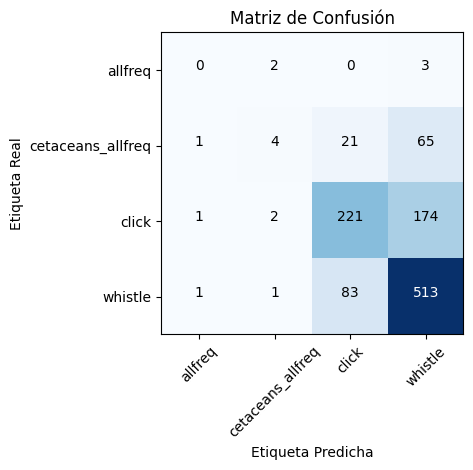

In [309]:
plot_confusion_matrix(y_test_decoded, y_pred_decoded, classes=unique_labels(y_test_decoded, y_pred_decoded))

# **2. Enfoque 2 - Imagenes de espectogramas**

In [1]:
from keras.preprocessing.image import ImageDataGenerator

In [2]:
TARGET_SIZE = (400, 400)
SEED = 42

In [3]:
train_generator = ImageDataGenerator(
    rescale=1/255.,
    shear_range=0.2,
        zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.15)

train_batches = train_generator.flow_from_directory(
    directory="./Datos/enfoque2",
    target_size=TARGET_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    seed=SEED,
    subset='training')

valid_batches=train_generator.flow_from_directory(
    directory="./Datos/enfoque2",
    target_size=TARGET_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    seed=SEED,
    subset='validation')

Found 4643 images belonging to 5 classes.
Found 816 images belonging to 5 classes.


In [4]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, TimeDistributed, LSTM

In [5]:
model = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(400, 400, 3)),
    MaxPooling2D((3,3)),
    Dropout(0.3),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((3,3)),
    Dropout(0.3),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((3,3)),
    Dropout(0.3),
    TimeDistributed(Flatten()),
    TimeDistributed(Dense(128, activation='relu')),
    LSTM(64),
    Dropout(0.3),
    Dense(5, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 398, 398, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 132, 132, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 132, 132, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 130, 130, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 43, 43, 64)        0

In [6]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [7]:
history = model.fit(
    train_batches,
    validation_data=valid_batches,
    batch_size=32,
    epochs=25
)

Epoch 1/25
146/146 [==============================] - 140s 911ms/step - loss: 0.9848 - accuracy: 0.5027 - val_loss: 0.9445 - val_accuracy: 0.5282
Epoch 2/25
146/146 [==============================] - 113s 777ms/step - loss: 0.9613 - accuracy: 0.5208 - val_loss: 0.9422 - val_accuracy: 0.5282
Epoch 3/25
146/146 [==============================] - 116s 792ms/step - loss: 0.9557 - accuracy: 0.5234 - val_loss: 0.9403 - val_accuracy: 0.5282
Epoch 4/25
146/146 [==============================] - 115s 790ms/step - loss: 0.9599 - accuracy: 0.5195 - val_loss: 0.9400 - val_accuracy: 0.5282
Epoch 5/25
146/146 [==============================] - 116s 791ms/step - loss: 0.9559 - accuracy: 0.5247 - val_loss: 0.9422 - val_accuracy: 0.5282
Epoch 6/25
146/146 [==============================] - 116s 794ms/step - loss: 0.9572 - accuracy: 0.5262 - val_loss: 0.9415 - val_accuracy: 0.5282
Epoch 7/25
146/146 [==============================] - 116s 796ms/step - loss: 0.9526 - accuracy: 0.5264 - val_loss: 0.9424 -